## Final Project Submission

Please fill out:
* Student name: Kourosh Alizadeh
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:


### To Do

- deal with duplicate IDs - not necessary

- deal with outliers
    - [DONE] for price, sqft_living
- [DONE] turn sqft basement binary
- [DONE] deal with NaN values 
- identify relevant features
- create dummies for categorical features
- create some new features

### Notes
- duplicate IDs are a result of multiple sales of the same house over some period of time
- since the vast majority of houses were never renovated (only 3% were renovated), went ahead and imputed 0 to the NaN values in the 'yr_renovated' column. The same reasoning and application applied to the 'view' column.

In [1]:
from custom_functions import *

df = pd.read_csv('data\kc_house_data.csv')

# dealt with null values. In the case of yr_renovated and view, there were few nulls and/or variety among non-nulls as to make 
# imputing 0 to all nulls reasonable. With regard to waterfront, 10% of the data was missing. I chose to impute random values at # the same ratio as the known values.
df['yr_renovated'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['waterfront'] = df['waterfront'].fillna(pd.Series(np.random.choice([0, 1], p=[.993, .007], size=len(df))))

# cutting out some outliers
df = df.drop(df.loc[df['price'] > np.mean(df['price']) + (2 * np.std(df['price']))].index)
df = df.drop(df.loc[df['sqft_living'] > np.mean(df['sqft_living']) + (2 * np.std(df['sqft_living']))].index)
df = df.drop(df.loc[df['sqft_living15'] > np.mean(df['sqft_living15']) + (2 * np.std(df['sqft_living15']))].index)


# log transformations to improve normality
df['price_log'] = df['price'].map(lambda x: np.log(x))
df['sqft_living_log'] = df['sqft_living'].map(lambda x: np.log(x))
df['sqft_living15_log'] = df['sqft_living15'].map(lambda x: np.log(x))
df['sqft_above_log'] = df['sqft_above'].map(lambda x: np.log(x))


# making the basement category numeric
df = df.drop(df.loc[df['sqft_basement'] == '?'].index)
# df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

# making some extra features
df['surrounding_space'] = df['sqft_lot'] - (df['sqft_above'] / df['floors'])
df['space_log'] = df['surrounding_space'].map(lambda x: np.log(x))
df['sqft_lot_log'] = df['sqft_lot'].map(lambda x: np.log(x))
df['bed_bath'] = df['bedrooms'] + df['bathrooms']
df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
df['has_renovation'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df['high_floors'] = df['floors'].map(lambda x: 0 if x < 2 else 1)

# getting dummies
view_dummies = pd.get_dummies(df['view'], prefix='view')
df = pd.concat([df, view_dummies], axis=1)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade')
df = pd.concat([df, grade_dummies], axis=1)
condition_dummies = pd.get_dummies(df['condition'], prefix='condition')
df = pd.concat([df, condition_dummies], axis=1)

In [2]:
df['bad_view'] = df['view'].map(lambda x: 1 if x == 0 else 0)
df['view_1-2'] = df['view'].map(lambda x: 1 if 0 < x < 3 else 0)
df['view_3-4'] = df['view'].map(lambda x: 1 if 2 < x < 5 else 0)
df['view_1-3'] = df['view'].map(lambda x: 1 if 0 < x < 4 else 0)

No multicollinearity detected for sqft_living_log.
No multicollinearity detected for waterfront.
No multicollinearity detected for has_basement.
No multicollinearity detected for high_floors.
No multicollinearity detected for view_4.0.
No multicollinearity detected for view_1-3.
                                 OLS Regression Results                                
Dep. Variable:              price_log   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.970e+06
Date:                Fri, 09 Oct 2020   Prob (F-statistic):                        0.00
Time:                        14:04:52   Log-Likelihood:                         -14080.
No. Observations:               18676   AIC:                                  2.817e+04
Df Residuals:                   18670   BIC:                                  2.822e+04
Df Model:       

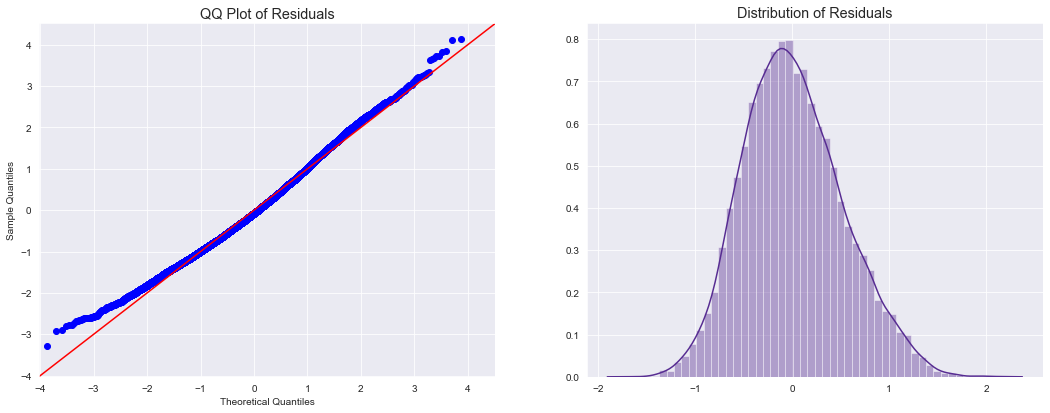

In [14]:
X = df[['waterfront', 'sqft_living15', 'sqft_lot15', 'has_basement', 'high_floors']]
x_list = [
    # 'bedrooms', 
    # 'bathrooms', 
    # 'sqft_living',
    'sqft_living_log',
    # 'sqft_lot',
    # 'sqft_lot_log', 
    # 'floors', 
    'waterfront', 
    # 'view', 
    # 'condition', 
    # 'grade',
    # 'sqft_above', 
    # 'sqft_above_log',
    # 'sqft_basement', 
    # 'yr_built', 
    # 'yr_renovated', 
    # 'zipcode',
    # 'lat', 
    # 'long', 
    # 'sqft_living15', 
    # 'sqft_living15_log',
    # 'sqft_lot15', 
    # 'surrounding_space', 
    # 'space_log',
    # 'bed_bath', 
    'has_basement', 
    # 'has_renovation', 
    'high_floors',
    # 'view_0.0', 
    # 'view_1.0', 
    # 'view_2.0',
    # 'view_3.0',
    'view_4.0',
    # 'bad_view',
    # 'view_1-2',
    'view_1-3',
    # 'view_3-4',
    # 'grade_3', 
    # 'grade_4', 
    # 'grade_5', 
    # 'grade_6', 
    # 'grade_7', 
    # 'grade_8',
    # 'grade_9', 
    # 'grade_10', 
    # 'grade_11', 
    # 'grade_12', 
    # 'condition_1', 
    # 'condition_2',
    # 'condition_3', 
    # 'condition_4', 
    # 'condition_5'
]
y = df['price']

price_model = check_model(df, x_list, 'price_log', show_summary=True, add_constant=False)
plot_residuals_and_qq(price_model)

In [12]:
het_goldfeldquandt(price_model.resid, price_model.model.exog)

(1.0484151294013466, 0.011200697818252224, &#39;increasing&#39;)

In [ ]:
feature_df = df[x_list]
X = feature_df
y = df['price_log']

# split the data into training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# run a linear regression
linreg = LinearRegression()
# linreg.fit(X_train, y_train)

# y_hat_train = linreg.predict(X_train)
# y_hat_test = linreg.predict(X_test)

r2 = make_scorer(r2_score)

cv_5_results  = (cross_val_score(linreg, X, y, cv=5, scoring=r2))
cv_5_results

In [ ]:
r2 = make_scorer(r2_score)
linreg = LinearRegression()

cv_5_results  = (cross_val_score(linreg, X, y, cv=5, scoring=r2))
cv_5_results

In [ ]:
df.loc[df['waterfront'] == 1]['view'].mean(), df['view'].mean()

In [ ]:


bp_test = het_breuschpagan(price_model.resid, df[x_list])
bp_test

In [ ]:
het_goldfeldquandt(price_model.resid, price_model.model.exog)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(price_model, 'sqft_living_log', fig=fig)

In [ ]:
list(residuals)[0: round(len(residuals)/2)], len(residuals), round(len(residuals)/2)

In [ ]:
normal_dist = np.random.normal(residuals.mean(), np.std(residuals), 1000)
scs.ks_2samp(normal_dist, residuals)

In [ ]:
selections = []
residuals = price_model.resid
for i in range(0, 10):
    sample = np.random.choice(residuals, 400)
    selections.append(sample)

for sample in selections:
    print(scs.shapiro(sample))

In [ ]:
print(het_breuschpagan(residuals, df['sqft_living_log']))

In [ ]:
scs.normaltest(residuals)

In [ ]:
residuals = price_model.resid
scs.shapiro(residuals)

In [ ]:
scs.bartlett(list(residuals)[0: round(len(residuals)/2)], list(residuals)[round(len(residuals)/2) + 1:len(residuals)])

In [ ]:
scs.levene(list(residuals)[0: round(len(residuals)/2)], list(residuals)[round(len(residuals)/2) + 1:len(residuals)])

In [ ]:
df.loc[df['sqft_basement'] == '?']['floors'].mean(), len(df.loc[df['sqft_basement'] == '?'])

In [ ]:
het_breuschpagan(price_model.resid, price_model.model.exog)


In [ ]:
df['price_log'].std()

In [ ]:
het_goldfeldquandt(price_model.resid, price_model.model.exog)

In [ ]:
for i in x_list:
  fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(price_model, i, fig=fig)  

In [ ]:
len(price_model.predict()), len(residuals)
plt.scatter(x=np.linspace(0, 1000, num=len(price_model.predict())), y=residuals)

In [ ]:
# cutting out some outliers
df = df.drop(df.loc[df['price'] > np.mean(df['price']) + (2 * np.std(df['price']))].index)
df = df.drop(df.loc[df['sqft_living'] > np.mean(df['sqft_living']) + (2 * np.std(df['sqft_living']))].index)
# df = df.drop(df.loc[df['sqft_living15'] > np.mean(df['sqft_living15']) + (2 * np.std(df['sqft_living15']))].index)


# log transformations to improve normality
df['price_log'] = df['price'].map(lambda x: np.log(x))
df['sqft_living_log'] = df['sqft_living'].map(lambda x: np.log(x))
df['sqft_living15_log'] = df['sqft_living15'].map(lambda x: np.log(x))

In [ ]:
df['sqft_living15'].hist()
plt.show() 
df['sqft_living'].hist()
plt.show()

In [ ]:
df['price_log'].hist()

In [ ]:
# making the basement category numeric
df = df.drop(df.loc[df['sqft_basement'] == '?'].index)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

In [ ]:
# identify categorical columns
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [ ]:
# making some extra features
df['surrounding_space'] = df['sqft_lot'] - (df['sqft_above'] / df['floors'])
df['space_log'] = df['surrounding_space'].map(lambda x: np.log(x))
df['sqft_lot_log'] = df['sqft_lot'].map(lambda x: np.log(x))
# df = df.dropna(subset=df['space_log'], axis=0)
df['bed_bath'] = df['bedrooms'] + df['bathrooms']
df['has_basement'] = df['sqft_basement'].map(lambda x: 0 if x > 0 else 1)
df['has_renovation'] = df['yr_renovated'].map(lambda x: 0 if x > 0 else 1)
df['high_floors'] = df['floors'].map(lambda x: 0 if x < 2 else 1)


In [ ]:
df.describe()

In [ ]:
waterfront_dummy = pd.get_dummies(df['waterfront'], prefix='waterfront')
df = pd.concat([df, waterfront_dummy], axis=1)

In [ ]:
views_dummies = pd.get_dummies(df['view'], prefix='views')
df = pd.concat([df, views_dummies], axis=1)

In [ ]:
grade_dummies = pd.get_dummies(df['grade'], prefix='grade')
df = pd.concat([df, grade_dummies], axis=1)
condition_dummies = pd.get_dummies(df['condition'], prefix='condition')
df = pd.concat([df, condition_dummies], axis=1)

In [ ]:
df.corr()

In [ ]:
ids = pd.DataFrame(df['id'].value_counts().sort_values(ascending=False)).reset_index()

In [ ]:
pd.plotting.scatter_matrix(df[['price', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built', ]], figsize=(20,20))

In [ ]:
renovated_houses['index'].sort_values(ascending=False)

In [ ]:
df['view'].unique()

In [ ]:
df['lat_expanded'] = df['lat'] * 1000
fig = plt.figure(figsize=(15, 7))
plt.scatter(x=df['lat_expanded'], y=df['sqft_living'])

In [ ]:
plt.scatter(x=df['lat'], y=df['price'])

In [ ]:
fig = plt.figure(figsize=(15, 15))
sns.set_style('darkgrid')
# sns.set_palette(sns.color_palette('Blues'))

# plt.scatter(x=df['lat'], y=df['long'])
ax = sns.scatterplot(x=df['lat'], y=df['long'], hue=df['price'], size=df['price'])
plt.show()

In [ ]:
146/(19075+146)

In [ ]:
df['waterfront'] = df['waterfront'].fillna(pd.Series(np.random.choice([0, 1], p=[.993, .007], size=len(df))))

In [ ]:
new_water.value_counts()

In [ ]:
21439+158, len(df)

In [ ]:
sns.set_palette(sns.color_palette('Reds'))
df['sqft_living15'].hist(bins=20)
plt.show()
df['sqft_living15'].map(lambda x: np.log(x)).hist(bins=20)
plt.show()
df['sqft_living'].hist(bins=20)
plt.show()
sns.scatterplot(x=df['sqft_living15'].map(lambda x: np.log(x)), y=df['price'])
plt.show()
sns.scatterplot(x=df['sqft_living15'].map(lambda x: np.log(x)), y=df['sqft_living'])
plt.show()

In [ ]:
price_fix = df.drop(df.loc[df['price'] > np.mean(df['price']) + (2 * np.std(df['price']))].index)
price_fix['price'] = price_fix['price'].map(lambda x: np.log(x))
price_fix['price'].hist(bins=20)

In [ ]:
np.mean(df['price']) + (3 * np.std(df['price']))

In [ ]:
df['space_log'] = df['surrounding_space'].map(lambda x: np.log(x))
df['space_log'].hist()

In [ ]:
X = df[['waterfront', 'sqft_living15', 'sqft_lot15', 'has_basement', 'high_floors']]
x_list = [
    # 'bedrooms', 
    # 'bathrooms', 
    # 'sqft_living',
    # 'sqft_living_log',
    # 'sqft_lot',
    # 'sqft_lot_log', 
    # 'floors', 
    'waterfront', 
    # 'view', 
    # 'condition', 
    # 'grade',
    # 'sqft_above', 
    # 'sqft_basement', 
    # 'yr_built', 
    # 'yr_renovated', 
    # 'zipcode',
    # 'lat', 
    # 'long', 
    # 'sqft_living15', 
    'sqft_living15_log',
    # 'sqft_lot15', 
    # 'surrounding_space', 
    # 'space_log',
    # 'bed_bath', 
    'has_basement', 
    # 'has_renovation', 
    'high_floors',
    # 'views_0.0', 
    # 'views_1.0', 
    # 'views_2.0', 
    # 'views_3.0', 
    # 'views_4.0', 
    # 'grade_3', 
    # 'grade_4', 
    # 'grade_5', 
    # 'grade_6', 
    # 'grade_7', 
    # 'grade_8',
    # 'grade_9', 
    # 'grade_10', 
    # 'grade_11', 
    # 'grade_12', 
    'condition_1', 
    'condition_2',
    'condition_3', 
    # 'condition_4', 
    'condition_5'
]
y = df['price']

price_model = check_model(df, x_list, 'price_log', show_summary=True, add_constant=False)
plot_residuals_and_qq(price_model)

In [ ]:
df.columns

In [ ]:
df
df['price_log'].hist()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(price_model.resid, df[x_list])
bp_test

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'waterfront', fig=fig)
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df[['price', 'sqft_living15', 'waterfront', 'has_basement', 'high_floors']], figsize=(20,20))
plt.show()

In [ ]:
df['sqft_living15_log'].hist()

In [ ]:
df['sqft_living15'].hist()

In [ ]:
residuals = price_model.resid
scs.shapiro(residuals)

In [ ]:
residuals = model.resid

model.resid.hist(bins=100)

In [ ]:
fig = sm.graphics.qqplot(residuals, dist=scs.norm, line='45', fit=True)
fig.show()

In [ ]:
def plot_residuals_and_qq(ols):
    residuals = ols.resid
    fig, axs = plt.subplots(ncols=2, figsize=(18, 6.5))
    sm.graphics.qqplot(residuals, dist=scs.norm, line='45', fit=True, ax=axs[0])
    axs[0].set_title('QQ Plot of Residuals', fontsize='x-large')
    sns.distplot(residuals, bins=50, ax=axs[1])
    axs[1].set_title('Distribution of Residuals', fontsize='x-large')
    plt.show()

In [ ]:
plot_residuals_and_qq(price_model)

In [ ]:
residuals.sort_values(ascending=True)

In [ ]:
cutaway = list(residuals.sort_values(ascending=True))[1:-2]

In [ ]:
scs.bartlett(residuals)

In [ ]:
scs.shapiro(cutaway)

In [ ]:
pred_val = price_model.fittedvalues.copy()
true_val = df['price_log'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(10,5))
scat = ax.scatter(residual, pred_val)


In [ ]:
df = df.drop(df.loc[df['price'] > np.mean(df['price']) + (2 * np.std(df['price']))].index)
df = df.drop(df.loc[df['price'] < np.mean(df['price']) - (2 * np.std(df['price']))].index)
